<a href="https://colab.research.google.com/github/vcwild/live-sentiment-analysis/blob/main/sentiment_analysis_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
  <img src="https://calln.com/wp-content/uploads/2019/10/Sentiment-Analysis-Infographic-860x600-860x600.png" alt="logo" width="350px"/>
<p>

<h1><strong>Oficina de Análise de Sentimentos</strong></h1>

- Plataforma Twitter
- Utilizar dados gerados em tempo real
- Mensurar a opinião pública sobre os assuntos escolhidos
- Análise de polaridade (simplificada)
  - Negativa (abaixo de zero)
  - Neutra (zero ou próxima a zero)
  - Positiva (acima de zero)

<img src="https://i1.wp.com/thedatascientist.com/wp-content/uploads/2018/10/sentiment-analysis.png" alt="logo" width="250px"/>





# Configurando o Notebook

<div>
<img src="https://braincube.com/wp-content/uploads/2020/02/icon-cloud.svg" alt="logo" width="200px"/>
</div>

### Instalando bibliotecas necessárias para o funcionamento dos programas

In [ ]:
!pip install  --upgrade googletrans --quiet \
  && pip install --upgrade unidecode --quiet

     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 1.0MB 14.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 245kB 6.8MB/s 


### Importando bibliotecas para rodar o notebook

In [ ]:
import  folium
from    folium            import  plugins
import  geopy
from    geopy.geocoders   import  Nominatim
from    googletrans       import  Translator
import  matplotlib.pyplot as plt
import  pandas            as pd 
import  numpy             as np 
from    textblob          import  TextBlob  as tb
import  tweepy
import  warnings
from    wordcloud         import  (WordCloud, STOPWORDS)
from    unidecode         import  unidecode

# Raspagem de Dados

<img src="https://i.pinimg.com/originals/2f/69/54/2f6954149ebdc0bce9480ca8052d6af6.gif" alt="logo" width="300px"/>



### Configurando o acesso à API do Twitter para obter os dados

#### Subindo as credenciais de acesso na máquina virtual do Colab

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving credentials.json to credentials.json


#### Lendo o arquivo de credenciais de acesso

In [ ]:
import json
with open('credentials.json', 'r') as file:
  credentials = json.load(file)
# Remover acesso dos outros usuários ao arquivo de credenciais
!chmod 600 credentials.json

#### Conectando com o autenticador da API

In [ ]:
auth = tweepy.OAuthHandler(credentials['API_KEY'], credentials['API_SECRET_KEY'])
auth.set_access_token(credentials['ACCESS_TOKEN'], credentials['ACCESS_TOKEN_SECRET'])

api = tweepy.API(
    auth, 
    wait_on_rate_limit=True, 
    wait_on_rate_limit_notify=True, 
    retry_count=5, 
    retry_delay=10
)

### Testando a resposta da API

In [109]:
api.me()

### Definindo as configurações de raspagem dos dados

In [ ]:
keyword = ['rocketseat']
LANGUAGE = 'en'
TWEET_COUNT = 1000

### Executando a raspagem dos dados

In [ ]:
tweets = []
info = []

cursor_items = tweepy.Cursor(
    api.search, 
    q=keyword, 
    tweet_mode='extended', 
    rpp=TWEET_COUNT, 
    result_type='mixed', 
    lang=LANGUAGE, 
    include_entities=True
).items(TWEET_COUNT)

for tweet in cursor_items:
    if 'retweeted_status' in dir(tweet):
        aux = tweet.retweeted_status.full_text
    else:
        aux = tweet.full_text

    new_tweet = aux.replace("\n", " ")

    tweets.append(new_tweet)
    info.append(tweet)

# Análise de dados

<img src="https://i.pinimg.com/originals/fc/71/63/fc71635c7f1b09ed30413f59bb749582.gif" alt="logo" width="350px"/>

### Contando os tweets coletados

In [ ]:
print(f'Total de tweets coletados: {len(info)}')

Total de tweets coletados: 129


### Estruturando os dados coletados em formato de tabela

In [ ]:
tweets_df = pd.DataFrame(tweets, columns = ['Tweets'])

tweets_df['len']          = np.array([len(tweet)             for tweet in tweets])
tweets_df['ID']           = np.array([tweet.id               for tweet in info])
tweets_df['USER']         = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName']     = np.array([tweet.user.name        for tweet in info])
tweets_df['userLocation'] = np.array([tweet.user.location    for tweet in info])
tweets_df['Language']     = np.array([tweet.user.lang        for tweet in info])
tweets_df['Date']         = np.array([tweet.created_at       for tweet in info])
tweets_df['Source']       = np.array([tweet.source           for tweet in info])
tweets_df['Likes']        = np.array([tweet.favorite_count   for tweet in info])
tweets_df['Retweets']     = np.array([tweet.retweet_count    for tweet in info])
tweets_df['Geo']          = np.array([tweet.geo              for tweet in info])
tweets_df['Coordinates']  = np.array([tweet.coordinates      for tweet in info])
tweets_df['Place']        = np.array([tweet.place            for tweet in info])

# tweets_df.to_csv('./tweets.csv')
tweets_df

,Tweets,len,ID,USER,userName,userLocation,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,@Enevinel @thdqo Woow! Fica show! 👏🏻👏🏻,39,1395010519912878085,rocketseat,Rocketseat,,None,2021-05-19 13:36:40,Twitter Web App,0,0,None,None,None
1,Just got my ticket for a special edition of #n...,204,1394757791563255818,DiogoSalesDev,Diogo Sales,"Recife, Brasil",None,2021-05-18 20:52:25,Twitter Web App,4,0,None,None,None
2,@alexcerlini @rocketseat Ficou show! ✅🤙,39,1394313090263552002,ppsattos,Pauℓσ Sanτσʂ ♲,"Contagem, Brasil",None,2021-05-17 15:25:20,Twitter for Android,2,0,None,None,None
3,@Marcos_dSantos @rocketseat Show!!!!!,37,1393234601527631880,BrunoChamps,Sr. Universo,Brazil,None,2021-05-14 15:59:48,Twitter for Android,2,0,None,None,None
4,@rocketseat Eu queria muito um vídeo sobre Exp...,76,1395869846978670593,bleszerd,Vinícius,"Altinópolis, Brasil",None,2021-05-21 22:31:20,Twitter for Android,0,0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,"@Marcos_dSantos Woooow! Ficou incrível, Marcos...",111,1393228163828928520,rocketseat,Rocketseat,,None,2021-05-14 15:34:13,Twitter Web App,1,0,None,None,None
125,"@lucas_oal Valeu demais, Lucas!💜 https://t.co/...",56,1393210711757705223,rocketseat,Rocketseat,,None,2021-05-14 14:24:52,Twitter Web App,1,0,None,None,None
126,"@robsonmarques @rocketseat @wtfwill_ Opa, já m...",54,1393199969763528707,proxy_go,Ladylike,,None,2021-05-14 13:42:11,Twitter for Android,2,0,None,None,None
127,@_Luiz_Sergio @PenaforteDias @BabiCarolina3 @J...,362,1393169859664564228,orrevuar,fransa,"Parnamirim, Brasil",None,2021-05-14 11:42:33,Twitter for Android,4,0,None,None,None


### Exibindo o tweet com mais curtidas

In [ ]:
likes_max = np.max(tweets_df['Likes'])
likes = tweets_df[tweets_df.Likes == likes_max].index[0]

print(f'O tweet com mais curtidas é: \n\n{tweets_df["Tweets"][likes]}, \nPor: {tweets_df["USER"][likes]} \nCom: {likes_max} curtidas.')

O tweet com mais curtidas é: 

Semana que vem a Rocketseat completa 4 anos de existência🎂  Ah, e não vamos ficar sem comemoração (em breve solto mais spoilers)🤐  Mas segue uma foto de quando tudo era mato🌳 https://t.co/wsKJjHiPOA, 
Por: dieegosf 
Com: 452 curtidas.


### Exibindo o tweet com mais retweets

In [ ]:
retweet_max = np.max(tweets_df['Retweets'])
retweet = tweets_df[tweets_df.Retweets == retweet_max].index[0]

print(f'O tweet com mais retweets é: \n\n{tweets_df["Tweets"][retweet]}, \nPor: {tweets_df["USER"][retweet]} \nCom: {retweet_max} retweets')

O tweet com mais retweets é: 

Semana que vem a Rocketseat completa 4 anos de existência🎂  Ah, e não vamos ficar sem comemoração (em breve solto mais spoilers)🤐  Mas segue uma foto de quando tudo era mato🌳 https://t.co/wsKJjHiPOA, 
Por: cleitonlsouza 
Com: 8 retweets


## Verificando de quais dispositivos e apps os usuários tweetaram

<img src="https://cdn0.tnwcdn.com/wp-content/blogs.dir/1/files/2015/02/android-loves-apple.jpeg" alt="logo" width="250px"/>



### Contando as fontes de dados

In [ ]:
sources = []

for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            
            pass

### Exibindo as fontes de dados

In [ ]:
sourceDF = pd.DataFrame({'source': percent}, index=sources)
sourceDF.rename(columns={'source':'n_tweets'}).sort_values(by='n_tweets', ascending=False)[:10]

,n_tweets
Twitter Web App,76.0
Twitter for Android,39.0
Twitter for iPhone,12.0
TheDeveloperBot,1.0
LinkedIn,1.0


# Análise de Sentimentos

<img src="https://webstockreview.net/images/clipart-bible-doctrine-11.gif" alt="logo" width="350px"/>


### Traduzindo o texto para o inglês (opcional)

In [ ]:
!pip install google_trans_new --quiet

In [ ]:
from google_trans_new import google_translator

translator = google_translator()

translator.translate()

In [ ]:

# tweets_df['Tweets'][0:3].apply(lambda x: translator.translate(str(x), src=LANGUAGE, dest='en'))
tweets_df['Tweets'] = tweets_df['Tweets'].apply(translator.translate, lang_src='pt', lang_tgt='en')

### Definindo o vetor de polaridade para cada tweet

In [ ]:
analysis = None
polarities = []

for tweet in tweets_df['Tweets']:
    analysis = tb(tweet)

    polarity = analysis.sentiment.polarity

    polarities.append(polarity)

## Verificando a média do sentimento nos tweets

In [ ]:
print(f'Para as palavras: {keyword}\nA média de sentimento é: {str(np.mean(polarities))}')

Para as palavras: ['rocketseat']
A média de sentimento é: 0.22354628320107972


## Calculando o somatório de sentimentos nos tweets

In [ ]:
positive, negative, neutral = 0, 0, 0

for polarity in polarities:
    if polarity > 0:
        positive += 1
    elif polarity < 0:
        negative += 1
    else:
        neutral += 1

pos_pct = positive * 100/len(polarities)
neg_pct = negative * 100/len(polarities)
neu_pct = neutral * 100/len(polarities)

sentiment_label = ['Positivos', 'Negativos', 'Neutros']
percents = [pos_pct, neg_pct, neu_pct]

pie_chart = pd.Series(percents, index=sentiment_label, name='')

## Exibindo o sentimento dos usuários em um gráfico de pizza

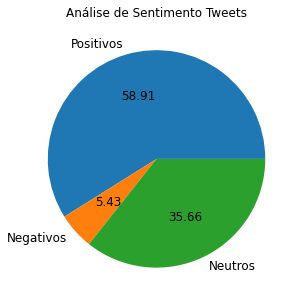

In [ ]:
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5), labels=pie_chart.index, title='Análise de Sentimento Tweets');

# Mapa localizador de Tweets

<img src="http://cdn.lowgif.com/full/5bd2dd5170883651-line-gif-find-share-on-giphy.gif" alt="logo" width="250px"/>



### Testando o localizador

In [ ]:
locator = Nominatim(user_agent='TweeterSentiments')
exemplo = locator.geocode('São Paulo')
exemplo

Location(São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil, (-23.5506507, -46.6333824, 0.0))

### Obtendo o mapa de calor da origem dos tweets

In [ ]:
latitude = []
longitude = []

for user_location in tweets_df['userLocation']:
    try:
        location = locator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=30)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('Heatmap_tweets_en.html')

## Exibindo o mapa de calor da origem dos tweets

In [ ]:
mapa

# Nuvem de palavras

<img src="https://cdn.dribbble.com/users/2000228/screenshots/6833456/gif_cloud.gif" alt="logo" width="250px"/>



## Limpando o texto para executar a nuvem de palavras

In [ ]:
words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([
    word for word in words.split()
        if 'https' not in word 
            and not word.startswith('@') 
            and not word.startswith('#')
            and word != 'RT'
])

warnings.simplefilter('ignore')
wc = WordCloud(
    min_font_size=10,
    max_font_size=300,
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000,
    normalize_plurals=True
).generate(words_clean)

## Exibindo a nuvem de palavras

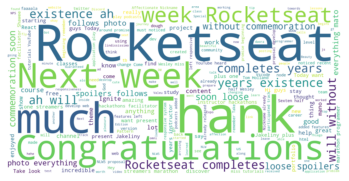

In [ ]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('word_cloud.png', dpi=300);

## Usando um dicionário de palavras para ignorar na geração da nuvem de palavras

In [ ]:
stopwords = set(STOPWORDS)
new_words = ['rocketseat', 'Rocketseat']

# with open("stopwords.txt", 'r') as f:
#     [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)
# new_stopwords = stopwords

words = ' '.join(tweets_df['Tweets'])

words_clean = " ".join([
    word for word in words.split()
        if 'https' not in word 
            and not word.startswith('@') 
            and not word.startswith('#')
            and word != 'RT'
])

warnings.simplefilter('ignore')
wc = WordCloud(
    min_font_size=10,
    max_font_size=300,
    background_color='white',
    mode='RGB',
    width=2000,
    height=1000,
    normalize_plurals=True
).generate(words_clean)

## Exibindo a nuvem de palavras que ignora essas palavras-chave

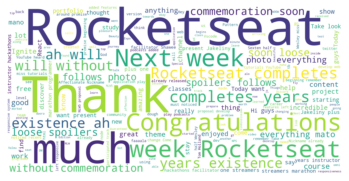

In [ ]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('cloud_fix.png', dpi=300);